# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


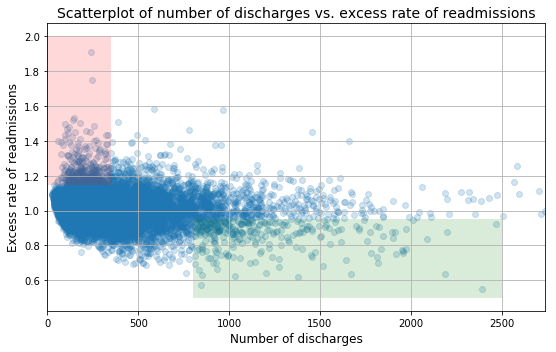

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A.

This missing data was handled appropriately. However, the scatterplot does not indicate a very strong negative correlation between Number of Discharges and Excess Rate of Readmissions. In fact, the scatterplot doesn't seem imply any correlation at all. The scatterplot makes a fairly horizontal trendline

The Statistic results seems to only convey information about hospitals with less than 100 discharges, and hospitals with more than 1000, leaving out the hospitals that have between 100 and 1000 discharges. As we can see from the scatterplot, that is a pretty significant chunk of the data being left unused.

No hypotheses testing was performed, which can cause such conclusions and recommendations made to be fairly dubious. It seems like a pretty arbitrary number was chosen as the threshold for maximum hospital size (300).

In [5]:
# Your turn


In [6]:
df = pd.read_csv('data/cms_hospital_readmissions.csv')
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
# Cleaning the data

clean_df = df[df['Number of Discharges'] != 'Not Available']
clean_df['Number of Discharges'] = pd.to_numeric(clean_df['Number of Discharges'])
clean_df = clean_df[['Number of Discharges', 'Excess Readmission Ratio']]
clean_df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)
clean_df.sort_values('Number of Discharges')

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123
1602,31,1.0992
2048,33,1.0847
2512,34,1.0720
2825,34,1.0651
2441,34,1.0738


In [8]:
more_than_100 = clean_df[clean_df['Number of Discharges'] > 100]
less_than_100 = clean_df[clean_df['Number of Discharges'] <= 100]

In [9]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    _ = plt.plot(x,y,marker ='.',linestyle = 'none')
    _ = plt.xlabel('Number of Discharges')
    _ = plt.ylabel('ECDF')
    _ = plt.grid

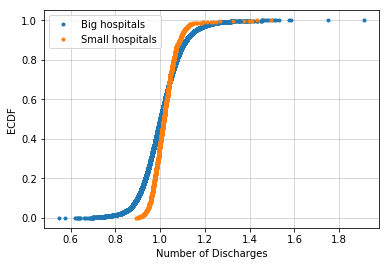

In [10]:
fig, ax = plt.subplots()
ax.grid(linestyle='-', linewidth='0.5')
ecdf(more_than_100['Excess Readmission Ratio'])
ecdf(less_than_100['Excess Readmission Ratio'])
_ = plt.legend(('Big hospitals', 'Small hospitals'))

The figure indicates a narrower distribution from small hospitals compared to large ones. 

### B.

#### 1.

Hypothesis testing should be set up such that:

Ho: Small and large hospitals have identical mean excess readmission rates.

Ha: Small and large hospitals have different mean excess readmission rates.

#### 2.

We are comparing means from two different sample populations. Since we are interested in hypothesis testing, by generating permutation samples:

In [11]:
# Draw permutation replicates
#perm_replicates = np.empty(100000)
#for i in range(len(perm_replicates)): 
    # Permute the data
#    both = np.concatenate((more_than_100['Excess Readmission Ratio'], less_than_100['Excess Readmission Ratio']))
#    both_perm = np.random.permutation(both)
#    perm_large = both_perm[:len(more_than_100)]
#    perm_small = both_perm[len(more_than_100):]
    #Draw replicates
#    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Assign difference in means as test statistic

def diff(data1, data2):
    '''Computes the difference of the two inputs 
    (here we are interested in difference of means)''' 
    diff = np.mean(data1) - np.mean(data2)
    
    return diff

def permutation_sample(data1, data2):
    '''Generate a permutation sample from two data samples.'''

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]

    return perm_sample1, perm_sample2

def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample1, perm_sample2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm_sample1, perm_sample2)

    return perm_replicates

# Compute difference of mean impact force from experiment: observed_diff_means
observed_diff = diff(more_than_100['Excess Readmission Ratio'], less_than_100['Excess Readmission Ratio'])

# Draw 100,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(less_than_100, more_than_100, diff, size=100000)

# Compute p-value: p
p = np.sum(abs(perm_replicates) >= abs(observed_diff)) / len(perm_replicates)

# Print the result
print('p-value =', p)



p-value = 0.99741


#### 3. 

The p-value is too high to be able to reject the null hypothesis, especially if we set alpha to 0.1

In [12]:
np.sum(perm_replicates)

-671.1429000291988

#### 4. 

Since the null hypotheses cannot be rejected, 

In [13]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_obs = diff_of_means(more_than_100['Excess Readmission Ratio'], less_than_100['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((more_than_100['Excess Readmission Ratio'], less_than_100['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large = both_perm[:len(more_than_100)]
    perm_small = both_perm[len(more_than_100):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs)
print('p-value:',p_value)

observed difference: -0.01632073298728165
p-value: 0.0


In [14]:
np.sum(perm_replicates)

-0.04485261560954479

#### 5.

##### Advantages: 
Gives clear indication of the correlation between Number of Discharges and Excess Rate of Readmissions. Using a scatterplot is also a good way to visualize all the data. 
##### Disadvantages:
The way the scatterplot is set up is not such that it illuminates the details we care about. As an example, we cannot see the distinction between hospitals with less than 100 discharges, and those with more. 



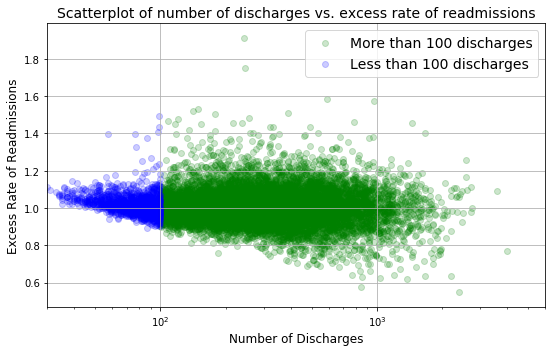

In [27]:
x_more_than = list(more_than_100['Number of Discharges'])
y_more_than = list(more_than_100['Excess Readmission Ratio'])
         
x_less_than = list(less_than_100['Number of Discharges'])
y_less_than = list(less_than_100['Excess Readmission Ratio'])
    
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_more_than, y_more_than, color='green', alpha=0.2)
ax.scatter(x_less_than, y_less_than, color='blue', alpha=0.2)

ax.set_xlim([30, 6000])
ax.set_xscale('log')
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess Rate of Readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.legend(['More than 100 discharges', 'Less than 100 discharges'], fontsize=14)

ax.grid(True)
fig.tight_layout()
         

This scatterplot separates the large and small hospitals based on their size. Logarithmic scaling was used for the x-axis to improve visualization (Small hospital data points would otherwise be extremely narrow).